In [39]:
%matplotlib inline

import sys
import os
sys.path.append('D:/SDB')

import numpy as np
import re

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import exposure, img_as_float, morphology, color
from skimage.measure import label
from PIL import Image

from osgeo import gdal
import osr
import my_packages.My_Geoprocess as mgp
from sklearn.cluster import KMeans

from scipy import stats


In [13]:
ImagesFolder = '/SDB/Poe/Images/Acolyte/S2A_MSIL1C_20180305T230901_N0206_R101_T58KEB_20180306T00234_bisAco/S2A_MSI_2018_03_05_23_09_01_T58KEB_L2R_tif/'
raster_wavelength = ['560']
raster_Name = ['rhos_' + f + '.tif' for f in raster_wavelength]
bands_data = []

for f in range(len(raster_Name)):
    raster_dataset = gdal.Open(ImagesFolder+raster_Name[f], gdal.GA_ReadOnly)
    band = raster_dataset.GetRasterBand(0)

geo_transform = raster_dataset.GetGeoTransform()
proj = raster_dataset.GetProjectionRef()

rows, cols = (raster_dataset.RasterYSize, raster_dataset.RasterXSize)

WorkingIndex = np.full((10980, 10980), False)
WorkingIndex[5000:,0:8501] = True


Occurence of label  0 :  50778356
Occurence of label  1 :  51644

Occurence of label  0 :  50778356
Occurence of label  1 :  1094
Occurence of label  2 :  2226
Occurence of label  3 :  1595
Occurence of label  4 :  6807
Occurence of label  5 :  1040
Occurence of label  6 :  3488
Occurence of label  7 :  2870
Occurence of label  8 :  3831
Occurence of label  9 :  795
Occurence of label  10 :  5946
Occurence of label  11 :  2369
Occurence of label  12 :  1780
Occurence of label  13 :  544
Occurence of label  14 :  528
Occurence of label  15 :  2521
Occurence of label  16 :  2835
Occurence of label  17 :  102
Occurence of label  18 :  4858
Occurence of label  19 :  68
Occurence of label  20 :  3051
Occurence of label  21 :  164
Occurence of label  22 :  459
Occurence of label  23 :  2673


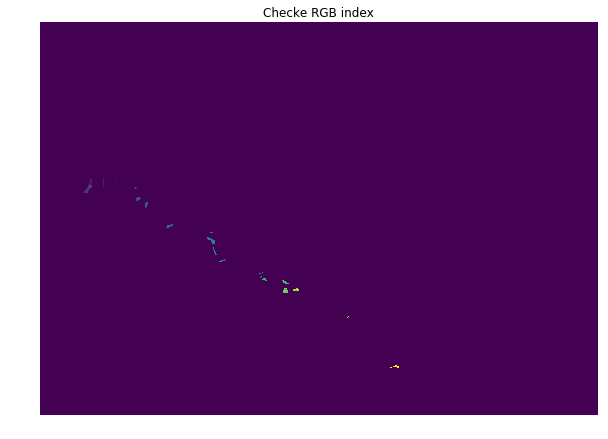

In [20]:
ShapeFolder = '/SDB/Poe/Shapes/'
RoiPathName = 'BottomsSamp.shp'

labeled_pixels = mgp.create_mask_from_vector(ShapeFolder + RoiPathName,  cols, rows, geo_transform, proj, target_value=1, format=gdal.GDT_Byte)
labeled_pixels = labeled_pixels.GetRasterBand(1).ReadAsArray(xoff=0, yoff=5000, win_xsize=8500, win_ysize=5980).astype(bool)
labeled_Samples = label(labeled_pixels)

for i in np.unique(labeled_pixels):
    print('Occurence of label {0: d} : {1: d}'.format(i, np.sum(labeled_pixels == i)))
print('')
    
plt.figure(figsize=(10, 10))
labeled_pixels = label(labeled_pixels)
plt.imshow(labeled_pixels)
plt.axis('off')

for i in np.unique(labeled_Samples):
    print('Occurence of label {0: d} : {1: d}'.format(i, np.sum(labeled_Samples == i)))


In [69]:
npzfile = np.load('/SDB/Poe/CompressedData/XData.npz')
X = npzfile['VolumFreeR']
Index = npzfile['FocusIndex']

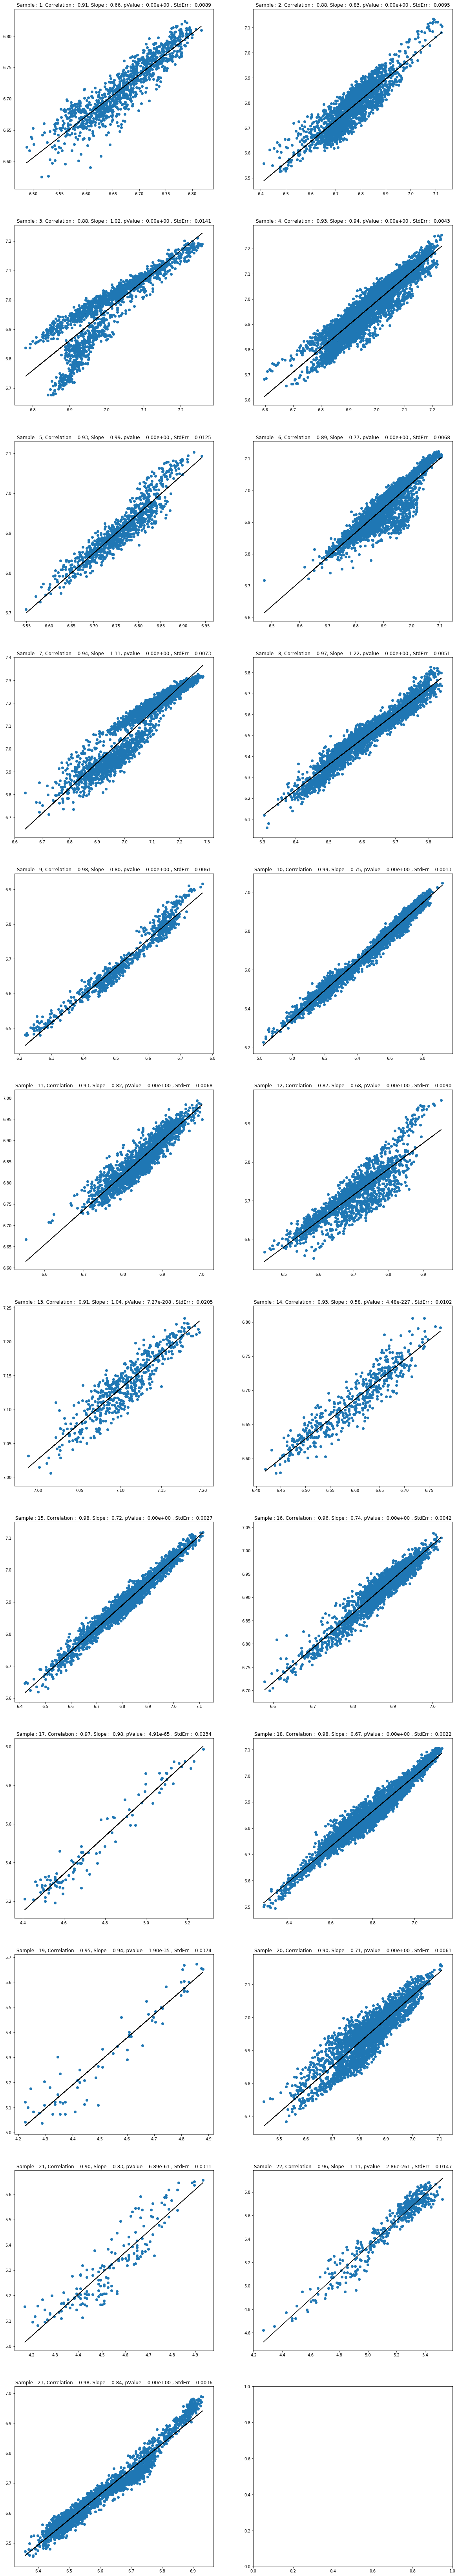

In [61]:
fig, axes = plt.subplots(12,2, figsize=(20, 120))
for i, ax in enumerate(fig.axes):
    if i == 23:
        continue
    x = np.log(6000.0*X[:,:,1][labeled_Samples==i+1])
    y = np.log(6000.0*X[:,:,2][labeled_Samples==i+1])
    ax.scatter(x,y)
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    ax.set_title('Sample : {0:d}, Correlation : {1: .2f}, Slope : {2: .2f}, pValue : {3: .2e} , StdErr : {4: .4f}'.format(i+1, r_value, slope, p_value, std_err))
    ax.plot(x, x*slope+intercept, c='k')
    

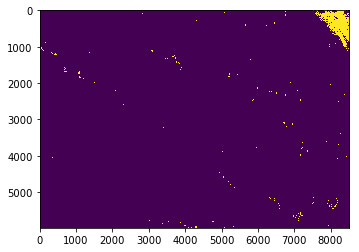

In [74]:
plt.imshow(X[:,:,1]<0)